In [1]:
import drama as drm
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec

import os
import glob
import h5py
import scipy.io as sio

%matplotlib inline

# import warnings
# warnings.filterwarnings('error')

/home/gf/packages/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/gf/packages/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [67]:
fils = sorted(glob.glob('../data/*.mat'), key=os.path.getsize)[1:18]
n_files = len(fils)
file_names = [i.split('/')[-1][:-4] for i in fils]
print (file_names)

['breastw', 'wine', 'vertebral', 'glass', 'pima', 'thyroid', 'ionosphere', 'cardio', 'wbc', 'arrhythmia', 'vowels', 'satellite', 'satimage-2', 'optdigits', 'mammography', 'shuttle', 'mnist']


In [68]:
for i in range(len(fils)):
    print (file_names[i])
    
    try:
        data = sio.loadmat(fils[i])
        X = data['X'].astype(float)
        y = data['y'].astype(float)

    except:
        data = h5py.File(fils[i])
        X = np.array(data['X']).T.astype(float)
        y = np.array(data['y']).T.astype(float)
        
        
    iinds = np.argwhere(y[:,0]==0)[:,0]
    oinds = np.argwhere(y[:,0]==1)[:,0]
    nhalf = iinds.shape[0]//2

    np.random.shuffle(iinds)
    np.random.shuffle(oinds)

    n_train = 3

    X_train = np.concatenate([X[iinds[:nhalf]],X[oinds[:n_train]]],axis=0)
    y_train = np.concatenate([y[iinds[:nhalf]],y[oinds[:n_train]]],axis=0)
    X_test = np.concatenate([X[iinds[nhalf:]],X[oinds[n_train:]]],axis=0)
    y_test = np.concatenate([y[iinds[nhalf:]],y[oinds[n_train:]]],axis=0)
    
    
    X_train = X_train/X_train.max()
    X_test = X_test/X_test.max()

    res = drm.unsupervised_outlier_finder_all(X_train)        

    auc = []
    mcc = []
    rws = []

    auc_b = -100
    mcc_b = -100
    rws_b = -100

    for i in range(50):
        for j in ['real','latent']:
            o1 = res[j][i]
            auc = drm.roc_auc_score(y_train==1, o1)
            mcc = drm.MCC(y_train==1, o1)
            rws = drm.rws_score(y_train==1, o1)

            if auc_b<auc:
                auc_b = auc
                auc_set = [j,res['drt'][i],res['metric'][i]]

            if mcc_b<mcc:
                mcc_b = mcc
                mcc_set = [j,res['drt'][i],res['metric'][i]]

            if rws_b<rws:
                rws_b = rws
                rws_set = [j,res['drt'][i],res['metric'][i]]


    res = drm.get_outliers(X_test,auc_set[1],auc_set[2],clustering=None,z_dim=2,space=auc_set[0])
    o1 = res[auc_set[0]][auc_set[2]]

    res = drm.get_outliers(X_test,mcc_set[1],mcc_set[2],clustering=None,z_dim=2,space=mcc_set[0])
    o2 = res[mcc_set[0]][mcc_set[2]]

    res = drm.get_outliers(X_test,rws_set[1],rws_set[2],clustering=None,z_dim=2,space=rws_set[0])
    o3 = res[rws_set[0]][rws_set[2]]

    acc = drm.roc_auc_score(y_test==1, o1)
    mcc = drm.MCC(y_test==1, o1)
    rws = drm.rws_score(y_test==1, o1)
    print(acc,mcc,rws)

breastw
0.9874026568941824 0.9125820735990228 0.9219409282700421
wine
1.0 1.0 1.0
vertebral
0.7382716049382717 0.25502645502645505 0.5767195767195767
glass


/home/gf/packages/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1138: RuntimeWarning: invalid value encountered in double_scalars
  return l1_diff.sum() / l1_sum.sum()
/home/gf/packages/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


0.6650485436893203 0.11812297734627832 0.047619047619047616
pima
0.7471471698113208 0.3781132075471698 0.66392396084551
thyroid
0.9485205314009661 0.4988526570048309 0.5164835164835165
ionosphere
0.9061803007410605 0.6943665011871357 0.7558353002884868
cardio
0.8511002206026081 0.35010890508502973 0.4319978738954222
wbc
0.8230912476722533 0.44972067039106145 0.5906432748538012
arrhythmia
0.743564437864956 0.36836910930175176 0.3531746031746032
vowels
0.8941315335492267 0.34172694531037195 0.300531914893617
satellite
0.23076286723605957 -0.25591177391226577 0.4889732394836235
satimage-2
0.9877724641845573 0.8946163950576741 0.8060528559249787
optdigits
0.6220582192608586 0.02113865680500388 0.08815958815958816
mammography
0.6332645643690329 0.2340628637619378 0.2229662473984255
shuttle
0.9214710441667238 0.7381670771412996 0.6257020146598111
mnist
0.9214848107515905 0.5878666391803309 0.5776907170723485


In [3]:
result = []
lof_all = np.zeros((n_files,3))
ifr_all = np.zeros((n_files,3))

for i in range(len(fils)):
    print (file_names[i])
    
    try:
        data = sio.loadmat(fils[i])
        X = data['X'].astype(float)
        y = data['y'].astype(float)

    except:
        data = h5py.File(fils[i])
        X = np.array(data['X']).T.astype(float)
        y = np.array(data['y']).T.astype(float)
        
    res = drm.unsupervised_outlier_finder_all(X)
    arr,drts,metrs = drm.result_array(res,y,'real')
    result.append(arr)
    
    df = drm.sk_check(X,X,y,[1])
    for j,scr in enumerate(['AUC','MCC','RWS']):
        lof_all[i,j] = df[scr][0]
        ifr_all[i,j] = df[scr][1]
    
result = np.array(result)

lympho


/home/gf/packages/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/gf/packages/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


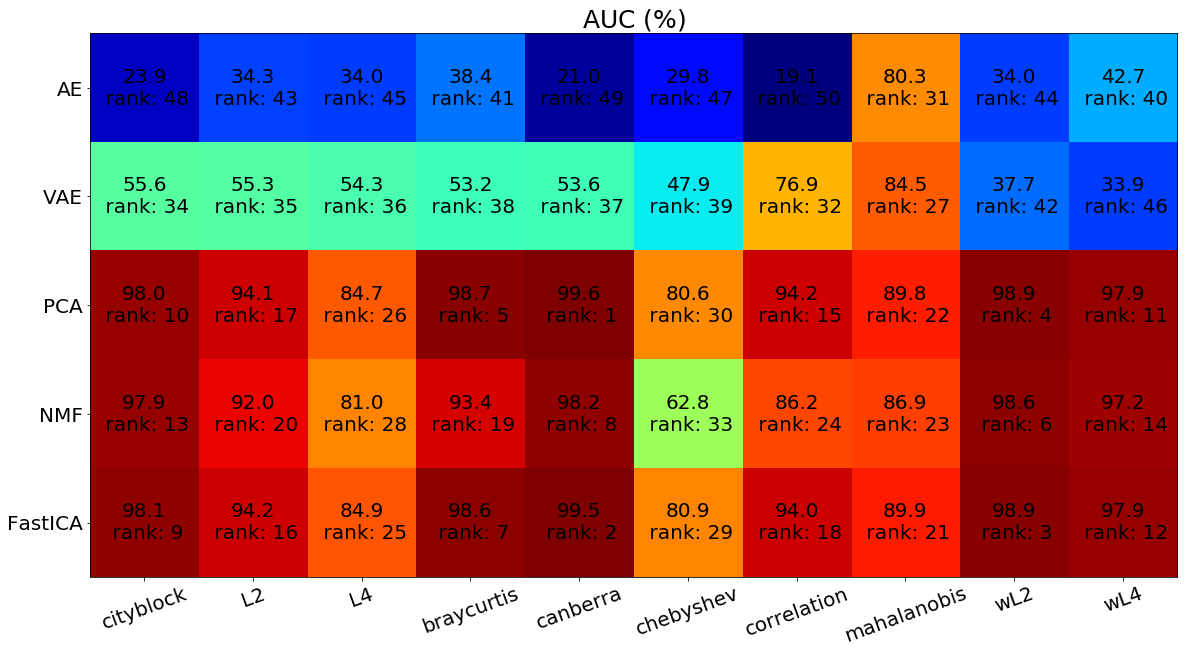

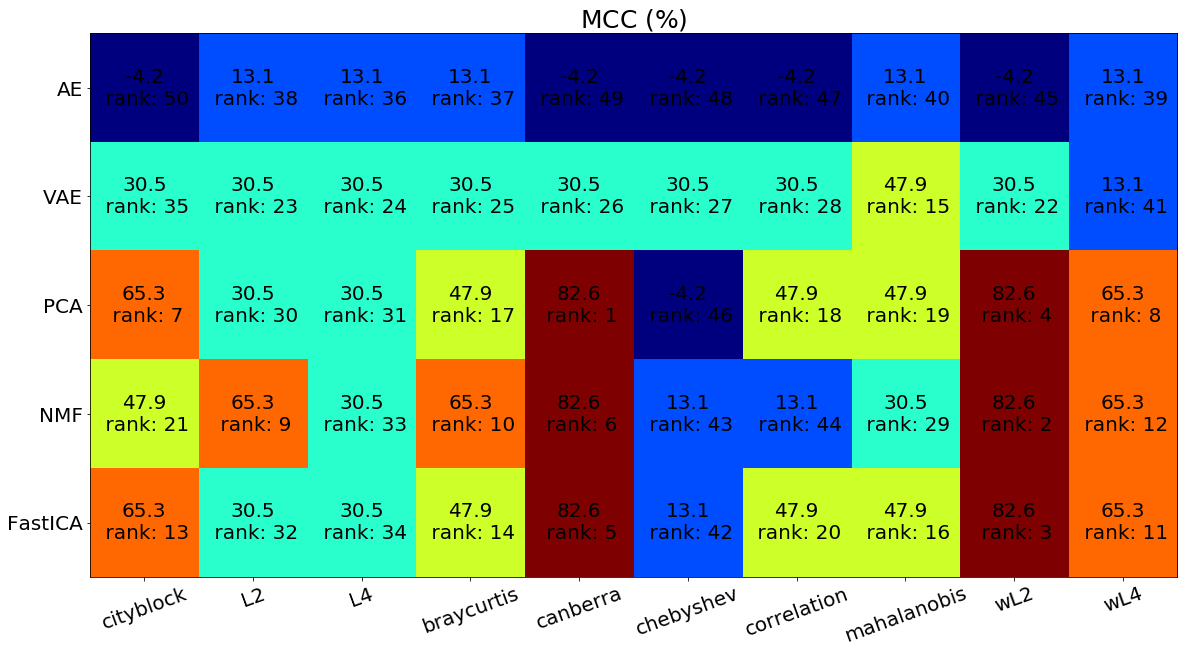

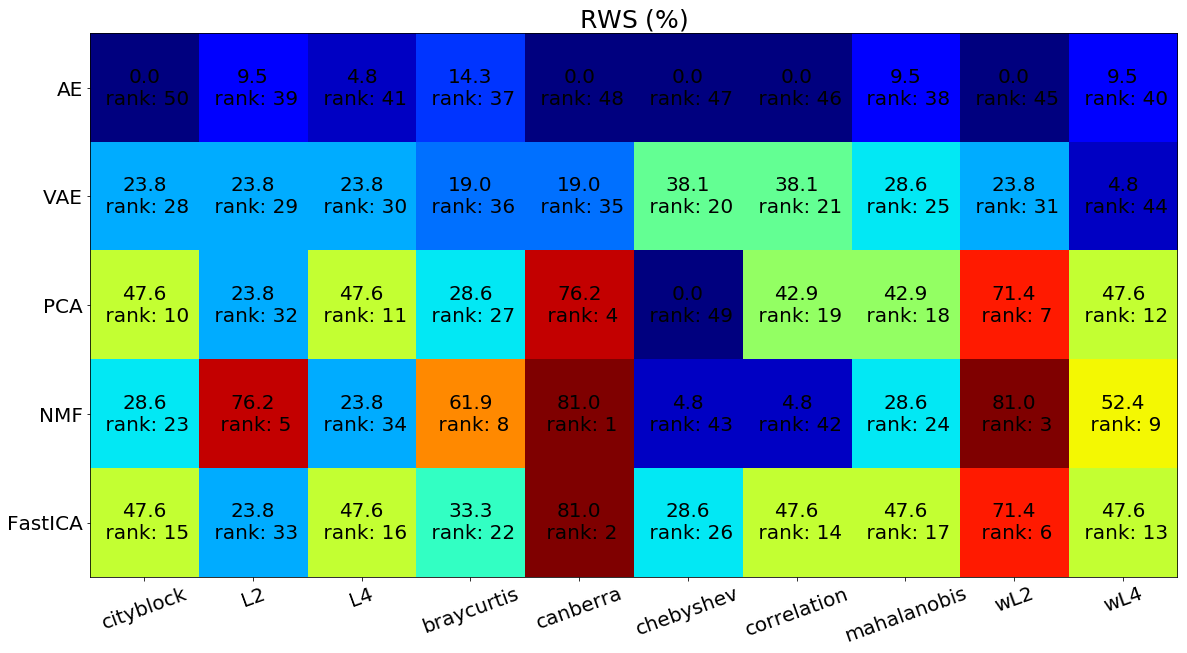

In [4]:
drm.plot_table(np.mean(result,axis=0),drts,metrs)

Text(0,-30,u'** Colors depend on AUC.')

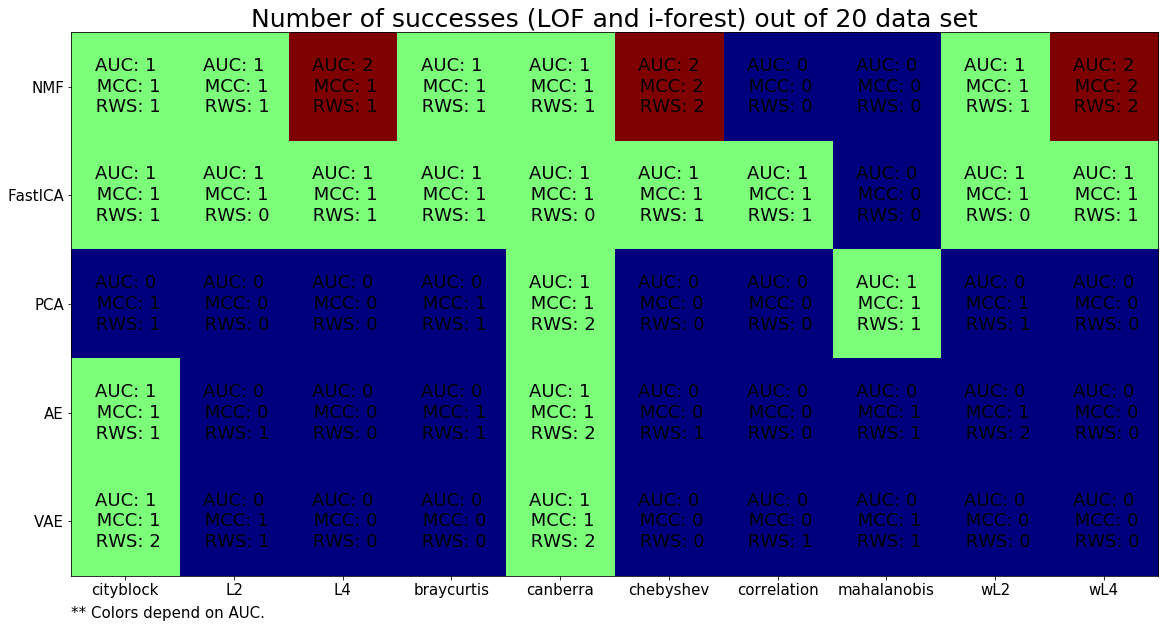

In [8]:
def result,lof_all
    auc = np.sum((result[:, :, :, 0].T>lof_all[:, 0]) & (result[:, :, :, 0].T>ifr_all[:, 0]),axis=-1).T
    mcc = np.sum((result[:, :, :, 1].T>lof_all[:, 1]) & (result[:, :, :, 1].T>ifr_all[:, 1]),axis=-1).T
    rws = np.sum((result[:, :, :, 2].T>lof_all[:, 2]) & (result[:, :, :, 2].T>ifr_all[:, 2]),axis=-1).T

    fig = plt.figure(figsize=(20,10))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect('auto')
    res = ax.imshow(auc, cmap=plt.cm.jet,interpolation='nearest')

    width, height = auc.shape

    for x in xrange(width):
        for y in xrange(height):
            ax.annotate('AUC: {:d}\n MCC: {:d}\n RWS: {:d}'.format(auc[x][y],mcc[x][y],rws[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',fontsize=18);

    plt.xticks(range(10),['cityblock','L2','L4','braycurtis',
                             'canberra','chebyshev','correlation','mahalanobis','wL2','wL4'],fontsize=15)
    plt.yticks(range(5), ['NMF','FastICA','PCA','AE','VAE'],fontsize=15)

    plt.title('Number of successes (LOF and i-forest) out of 20 data set',fontsize=25)
    plt.annotate('** Colors depend on AUC.', (0,0), (0, -30), xycoords='axes fraction',
                 textcoords='offset points', va='top',fontsize=15)

    # plt.savefig('AND_success.jpg',dpi=150,bbox_inches='tight')